In [15]:
import numpy as np
import pandas as pd
from numpy.linalg import inv

def fit_regression_models(file_path):
    # Load data
    df = pd.read_csv(file_path)
    X = df['Temp'].values
    y = df['Yield'].values

    # Linear Regression
    X_b = np.c_[np.ones(X.shape[0]), X]  # Add bias term
    theta_linear = inv(X_b.T @ X_b) @ X_b.T @ y
    intercept_linear, slope_linear = theta_linear

    # Polynomial Regression (degree 2)
    X_poly = np.c_[X**2, X, np.ones(X.shape[0])]  # X^2, X, and bias term
    theta_poly = inv(X_poly.T @ X_poly) @ X_poly.T @ y
    quadratic_coef, linear_coef, intercept_poly = theta_poly

    return (intercept_linear, slope_linear), (intercept_poly, linear_coef, quadratic_coef)

# Example usage
linear_coeffs, poly_coeffs = fit_regression_models('yield_data.csv')
print(f"Linear Regression Coefficients: Intercept = {linear_coeffs[0]}, Slope = {linear_coeffs[1]}")
print(f"Polynomial Regression Coefficients: Intercept = {poly_coeffs[0]}, Linear Coef = {poly_coeffs[1]}, Quadratic Coef = {poly_coeffs[2]}")


Linear Regression Coefficients: Intercept = 2.3063063063063094, Slope = 0.006756756756756757
Polynomial Regression Coefficients: Intercept = 7.960481099655067, Linear Coef = -0.15371134020614743, Quadratic Coef = 0.001075601374570264


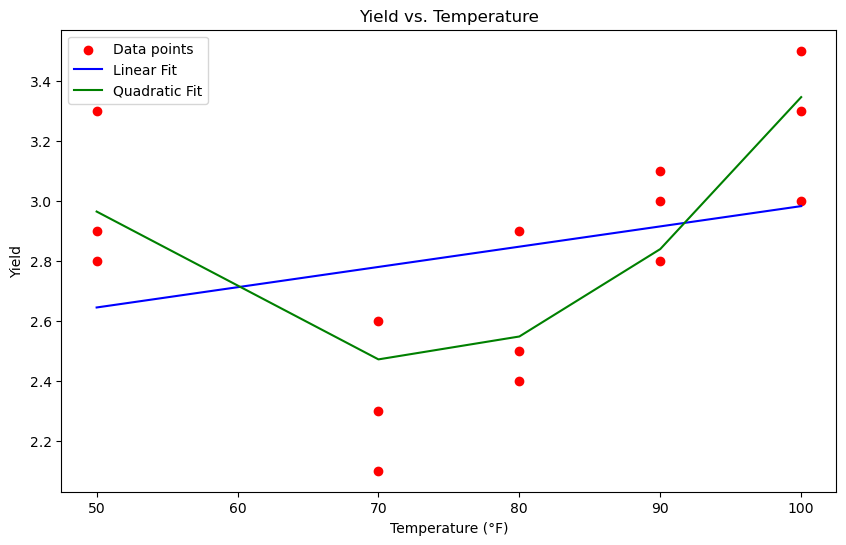

In [16]:
import matplotlib.pyplot as plt

def plot_regression(file_path):
    # Load data
    df = pd.read_csv(file_path)
    X = df['Temp'].values
    y = df['Yield'].values

    # Fit models
    linear_coeffs, poly_coeffs = fit_regression_models(file_path)
    intercept_linear, slope_linear = linear_coeffs
    intercept_poly, linear_coef, quadratic_coef = poly_coeffs

    # Predictions
    y_pred_linear = intercept_linear + slope_linear * X
    y_pred_poly = intercept_poly + linear_coef * X + quadratic_coef * X**2

    # Create plots
    plt.figure(figsize=(10, 6))
    
    # Scatter plot of raw data
    plt.scatter(X, y, color='red', label='Data points')

    # Plot the linear fit
    plt.plot(X, y_pred_linear, color='blue', label='Linear Fit')

    # Plot the quadratic fit
    plt.plot(X, y_pred_poly, color='green', label='Quadratic Fit')

    # Labels and title
    plt.xlabel('Temperature (°F)')
    plt.ylabel('Yield')
    plt.title('Yield vs. Temperature')
    plt.legend()

    # Show plot
    plt.show()

# Example usage
plot_regression('yield_data.csv')


In [18]:
def compute_errors(file_path):
    # Load data
    df = pd.read_csv(file_path)
    X = df['Temp'].values
    y = df['Yield'].values

    # Fit models
    linear_coeffs, poly_coeffs = fit_regression_models(file_path)
    intercept_linear, slope_linear = linear_coeffs
    intercept_poly, linear_coef, quadratic_coef = poly_coeffs

    # Predictions
    y_pred_linear = intercept_linear + slope_linear * X
    y_pred_poly = intercept_poly + linear_coef * X + quadratic_coef * X**2

    # Compute errors
    mse_linear = np.mean((y - y_pred_linear) ** 2)
    rmse_linear = np.sqrt(mse_linear)
    
    mse_poly = np.mean((y - y_pred_poly) ** 2)
    rmse_poly = np.sqrt(mse_poly)

    return (mse_linear, rmse_linear), (mse_poly, rmse_poly)

# Example usage
mse_linear, rmse_linear = compute_errors('yield_data.csv')
mse_poly, rmse_poly = compute_errors('yield_data.csv')
print(f"Linear Regression - MSE: {mse_linear}, RMSE: {rmse_linear}")
print(f"Polynomial Regression - MSE: {mse_poly}, RMSE: {rmse_poly}")


Linear Regression - MSE: (0.13270870870870868, 0.3642920651190589), RMSE: (0.04778465063001146, 0.21859700508015076)
Polynomial Regression - MSE: (0.13270870870870868, 0.3642920651190589), RMSE: (0.04778465063001146, 0.21859700508015076)
